<a href="https://colab.research.google.com/github/pendosataubat/Predictive_Machine_Techniical_Assignment/blob/main/Predictive_Machine_AI4I_2020_Predictive_Maintenance_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import time
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Google Drive file ID
file_id = '1d7AsV3spwCKtxYPaL-KPHHAWsL4CpV7c'

# Direct download URL
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Membaca file CSV menggunakan pandas
data = pd.read_csv(download_url)

# Menampilkan beberapa baris pertama dari data
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:
print(data.describe())

               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000   

In [ ]:
# Check for missing values
print(data.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [ ]:
# Menampilkan dimensi dari data
data.shape

(10000, 14)

In [ ]:
#Mencari keberadaan missing value dari dataset Raisin
features_with_na = [features for features in data.columns if data[features].notnull().sum()>1]
for feature in features_with_na:
  print(feature, np.round(data[feature].isnull().mean(), 4), ' % of missing values')

UDI 0.0  % of missing values
Product ID 0.0  % of missing values
Type 0.0  % of missing values
Air temperature [K] 0.0  % of missing values
Process temperature [K] 0.0  % of missing values
Rotational speed [rpm] 0.0  % of missing values
Torque [Nm] 0.0  % of missing values
Tool wear [min] 0.0  % of missing values
Machine failure 0.0  % of missing values
TWF 0.0  % of missing values
HDF 0.0  % of missing values
PWF 0.0  % of missing values
OSF 0.0  % of missing values
RNF 0.0  % of missing values


In [ ]:
count_per_class = data['Machine failure'].value_counts()

print(count_per_class)

Machine failure
0    9661
1     339
Name: count, dtype: int64


In [ ]:
from sklearn.utils import resample

# Hapus kolom target lainnya
columns_to_drop = ['HDF', 'PWF', 'OSF', 'RNF']
data_single_target = data.drop(columns=columns_to_drop)

# Memisahkan kelas mayoritas dan minoritas
df_majority = data_single_target[data_single_target['Machine failure'] == 0]
df_minority = data_single_target[data_single_target['Machine failure'] == 1]

# Oversampling kelas minoritas
df_minority_oversampled = resample(df_minority,
                                   replace=True,    # pengambilan sampel dengan penggantian
                                   n_samples=len(df_majority),  # untuk menyamakan dengan kelas mayoritas
                                   random_state=42)  # hasil yang dapat direproduksi

# Menggabungkan kelas mayoritas dengan kelas minoritas yang telah di-oversample
df_balanced = pd.concat([df_majority, df_minority_oversampled])

# Mengacak dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Menyimpan dataset yang telah seimbang ke dalam file CSV baru
balanced_file_path = './ai4i2020_balanced.csv'
df_balanced.to_csv(balanced_file_path, index=False)


In [ ]:
balanced_file_path = './ai4i2020_balanced.csv'
df_balanced = pd.read_csv(balanced_file_path)

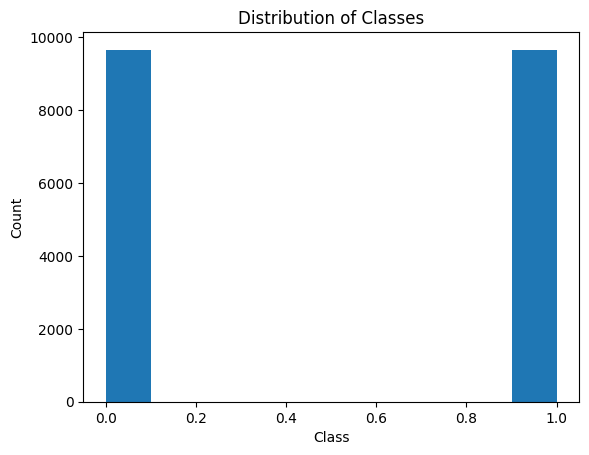

In [ ]:
# Contoh: Visualisasi data
import matplotlib.pyplot as plt
plt.hist(df_balanced['Machine failure'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()

In [ ]:
count_per_class = df_balanced['Machine failure'].value_counts()

print(count_per_class)

Machine failure
0    9661
1    9661
Name: count, dtype: int64


In [ ]:
# Menampilkan dimensi dari data
df_balanced.shape

(19322, 10)

In [ ]:
print(df_balanced.head())

    UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0  5677     L52856    L                302.3                    311.8   
1  3929     L51108    L                302.6                    311.5   
2  5780     L52959    L                301.6                    311.1   
3  8858     L56037    L                297.7                    308.9   
4  5395     M20254    M                302.8                    312.3   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  
0                    1565         37.8               59                0    0  
1                    1442         59.8              169                1    0  
2                    1680         29.2              111                0    0  
3                    1742         26.3               24                0    0  
4                    1262         70.5              234                1    0  


In [ ]:
# Menampilkan kolom-kolom dengan tipe data integer
integer_features = df_balanced.select_dtypes(include=[np.integer])
integer_features.columns

Index(['UDI', 'Rotational speed [rpm]', 'Tool wear [min]', 'Machine failure',
       'TWF'],
      dtype='object')

In [ ]:
df_balanced = df_balanced.astype({'UDI' : 'float64', 'Rotational speed [rpm]' : 'float64', 'Tool wear [min]' : 'float64', 'TWF' : 'float64'})

In [ ]:
# Menampilkan kolom-kolom dengan tipe data float
float_features = df_balanced.select_dtypes(include=[np.float64])
float_features.columns

Index(['UDI', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF'],
      dtype='object')

Index(['UDI', 'Process temperature [K]', 'Air temperature [K]', 'TWF',
       'Tool wear [min]', 'Torque [Nm]', 'Rotational speed [rpm]'],
      dtype='object')


<Axes: >

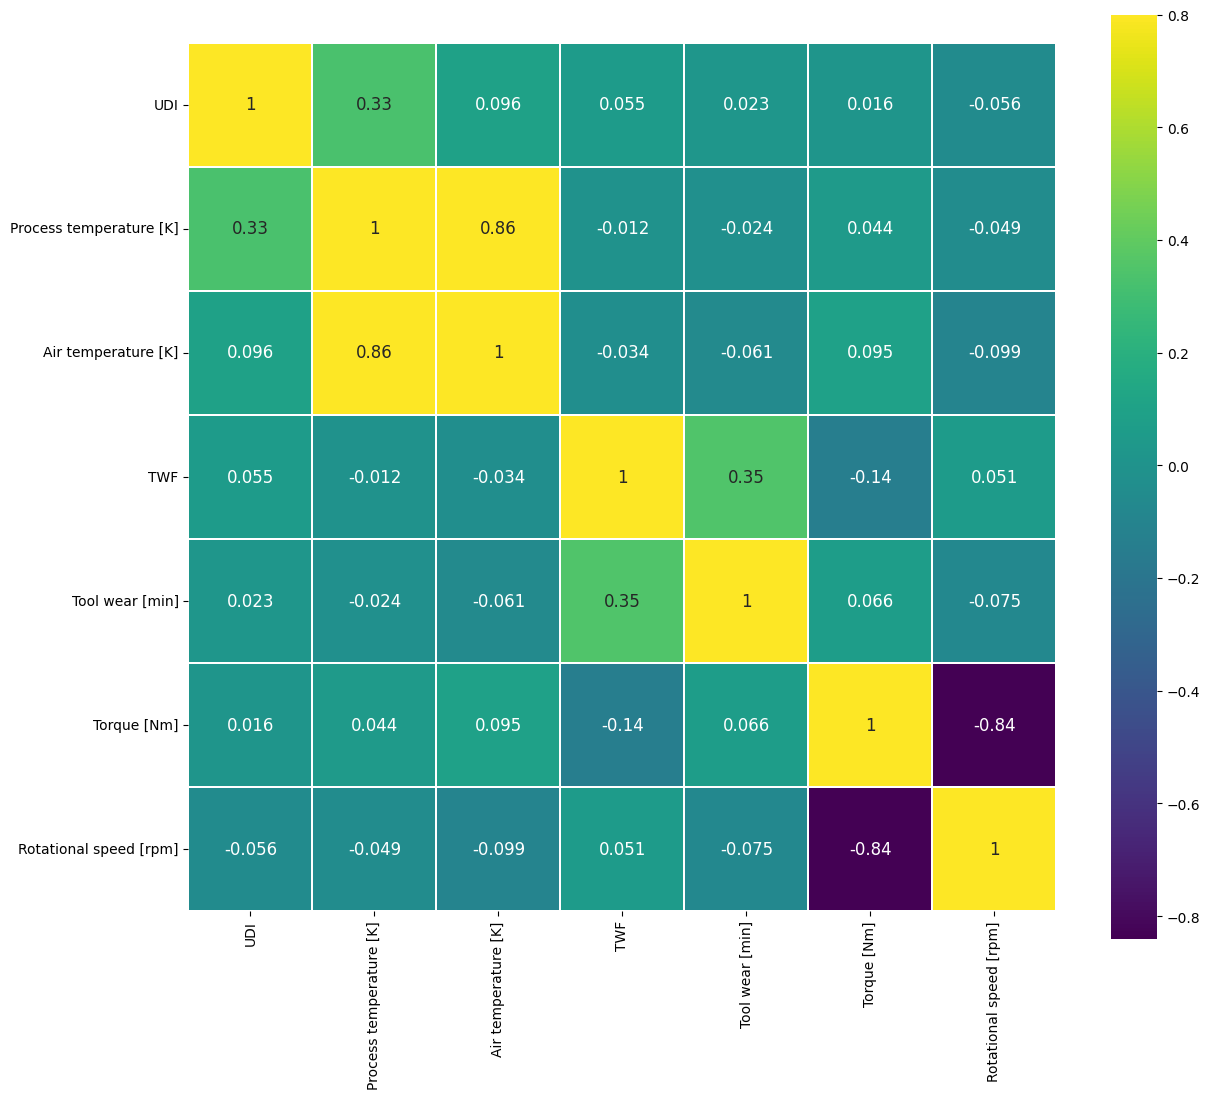

In [ ]:
correlation = float_features.corr()
k= 8
cols = correlation.nlargest(8,'UDI')['UDI'].index
print(cols)
cm = np.corrcoef(df_balanced[cols].values.T)
f, ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis', linecolor='white',xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [ ]:
# Memilih kolom yang relevan untuk X dan y
X = df_balanced[['UDI', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y = df_balanced['Machine failure']

# Membagi data menjadi set pelatihan dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standarisasi fitur-fitur input
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Menemukan k optimal menggunakan cross-validation
k_range = range(1, 31)
k_scores = []
fit_times = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)

    start_time = time.time() # Waktu mulai
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    fit_time = time.time() - start_time # Menghitung fit time

    k_scores.append(scores.mean())
    fit_times.append(fit_time)
    print(f"k={k}, Cross-Validated Accuracy={scores.mean():.4f}, Fit Time={fit_time:.4f} seconds")

k=1, Cross-Validated Accuracy=0.9894, Fit Time=0.8426 seconds
k=2, Cross-Validated Accuracy=0.9894, Fit Time=0.8597 seconds
k=3, Cross-Validated Accuracy=0.9805, Fit Time=0.8684 seconds
k=4, Cross-Validated Accuracy=0.9805, Fit Time=0.8843 seconds
k=5, Cross-Validated Accuracy=0.9733, Fit Time=0.9388 seconds
k=6, Cross-Validated Accuracy=0.9733, Fit Time=1.1760 seconds
k=7, Cross-Validated Accuracy=0.9673, Fit Time=1.3213 seconds
k=8, Cross-Validated Accuracy=0.9673, Fit Time=1.2863 seconds
k=9, Cross-Validated Accuracy=0.9617, Fit Time=0.8905 seconds
k=10, Cross-Validated Accuracy=0.9617, Fit Time=0.9494 seconds
k=11, Cross-Validated Accuracy=0.9571, Fit Time=0.8830 seconds
k=12, Cross-Validated Accuracy=0.9571, Fit Time=0.9246 seconds
k=13, Cross-Validated Accuracy=0.9519, Fit Time=0.9353 seconds
k=14, Cross-Validated Accuracy=0.9517, Fit Time=0.9234 seconds
k=15, Cross-Validated Accuracy=0.9470, Fit Time=0.9229 seconds
k=16, Cross-Validated Accuracy=0.9466, Fit Time=0.9689 seconds
k

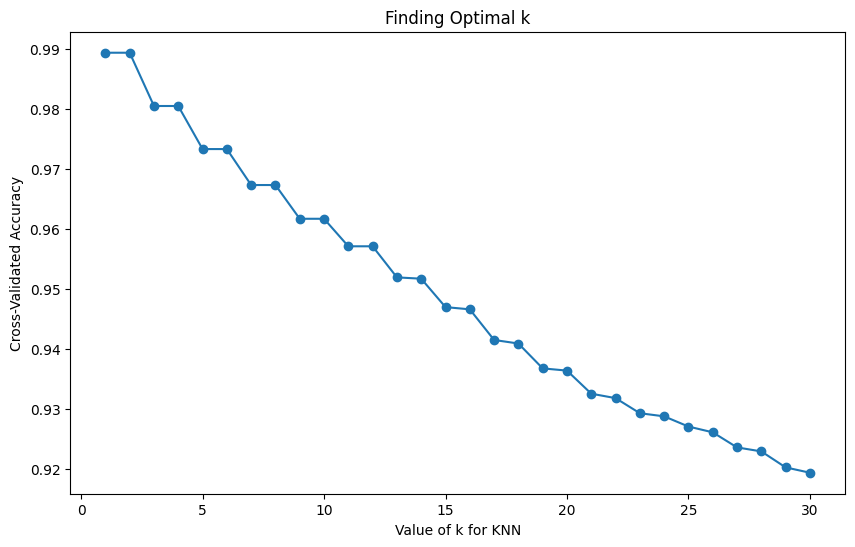

In [ ]:
# Plot hasil cross-validation
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Finding Optimal k')
plt.show()

In [ ]:
# Menentukan k terbaik
best_k = k_range[np.argmax(k_scores)]
print(f"The best value for k is {best_k} with a cross-validated accuracy of {max(k_scores):.4f}")


The best value for k is 1 with a cross-validated accuracy of 0.9894


In [ ]:
# Evaluasi model dengan k terbaik pada set uji
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
start_time = time.time() # Watu mulai
test_accuracy = knn.score(X_test, y_test)
fit_time = time.time() - start_time # Menghitung fit time
print(f"Test set accuracy with k={best_k}: {test_accuracy:.4f}")
print(f"Fit time on test set: {fit_time:.4f} seconds")

Test set accuracy with k=1: 0.9905
Fit time on test set: 0.3754 seconds


In [ ]:
# Membuat classifier Naive Bayes
nb_classifier = GaussianNB()

# Melatih classifier Naive Bayes
start_time = time.time()  # Waktu mulai
nb_classifier.fit(X_train, y_train)
fit_time = time.time() - start_time  # Menghitung fit time

# Menguji classifier Naive Bayes
start_time = time.time()  # Waktu mulai
test_accuracy_nb = nb_classifier.score(X_test, y_test)
fit_time_test = time.time() - start_time  # Hitung waktu pengujian pada set uji

# Menampilkan output
print(f"Training time for Naive Bayes: {fit_time:.4f} seconds")
print(f"Test set accuracy for Naive Bayes: {test_accuracy_nb:.4f}")
print(f"Fit time on test set for Naive Bayes: {fit_time_test:.4f} seconds")

Training time for Naive Bayes: 0.0329 seconds
Test set accuracy for Naive Bayes: 0.8201
Fit time on test set for Naive Bayes: 0.0271 seconds
